In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [39]:
# import warnings filter
from warnings import simplefilter

In [40]:
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)

In [41]:
# read the dataset file
df = pd.read_csv('data.csv', header = None)

df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

In [42]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [43]:
### 1 = male, 0 = female
df.isnull().sum()

df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())
df['sex'] = df.sex.map({'female': 0, 'male': 1})

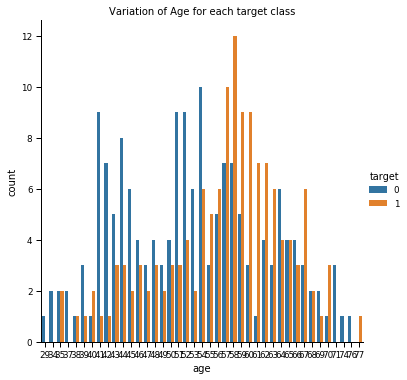

In [44]:
################################## Plots

# distribution of target vs age 
sns.set_context("paper", font_scale = 1, rc = {"font.size": 10,"axes.titlesize": 10,"axes.labelsize": 10}) 
sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

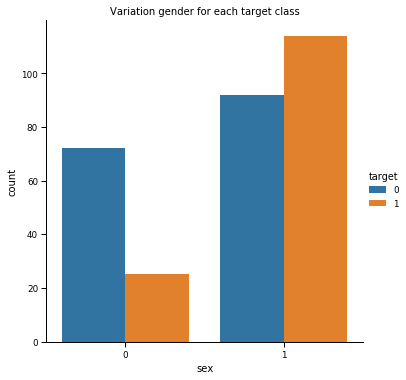

In [45]:
# distribution of target vs sex 
sns.set_context("paper", font_scale = 1, rc = {"font.size": 10,"axes.titlesize": 10,"axes.labelsize": 10}) 
sns.catplot(kind = 'count', data = df, x = 'sex', hue = 'target', order = df['sex'].sort_values().unique())
plt.title('Variation gender for each target class')
plt.show()

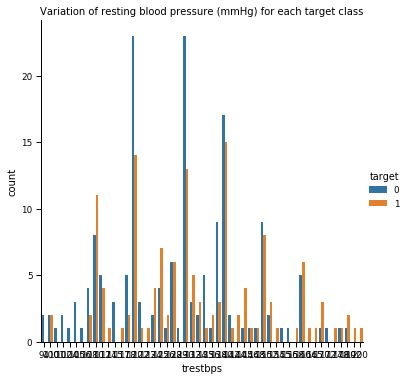

In [46]:
# distribution of target vs BP 
sns.set_context("paper", font_scale = 1, rc = {"font.size": 10,"axes.titlesize": 10,"axes.labelsize": 10}) 
sns.catplot(kind = 'count', data = df, x = 'trestbps', hue = 'target', order = df['trestbps'].sort_values().unique())
plt.title('Variation of resting blood pressure (mmHg) for each target class')
plt.show()

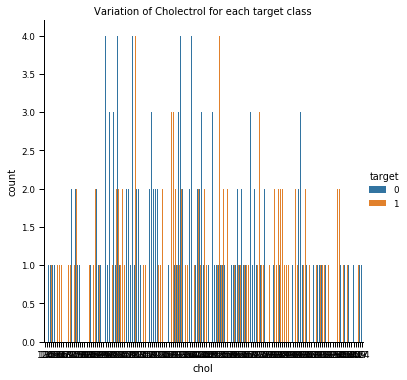

In [47]:
# distribution of target vs Chol 
sns.set_context("paper", font_scale = 1, rc = {"font.size": 10,"axes.titlesize": 10,"axes.labelsize": 10}) 
sns.catplot(kind = 'count', data = df, x = 'chol', hue = 'target', order = df['chol'].sort_values().unique())
plt.title('Variation of Cholectrol for each target class')
plt.show()

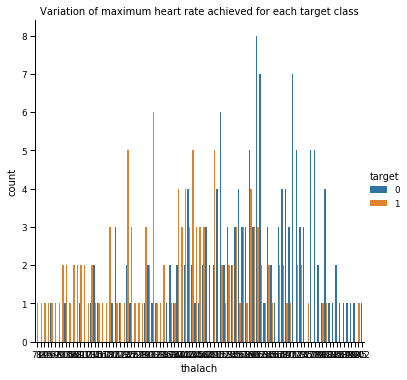

In [48]:
# distribution of target vs thalach 
sns.set_context("paper", font_scale = 1, rc = {"font.size": 10,"axes.titlesize": 10,"axes.labelsize": 10}) 
sns.catplot(kind = 'count', data = df, x = 'thalach', hue = 'target', order = df['thalach'].sort_values().unique())
plt.title('Variation of maximum heart rate achieved for each target class')
plt.show()

In [72]:
#trestbps
#chol
#Thalach


################################## data assignment
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
#########################################   SVM   #############################################################

classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [52]:
cm_test = confusion_matrix(y_pred, y_test)


In [53]:
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for svm = 0.9256198347107438
Accuracy for test set for svm = 0.8032786885245902


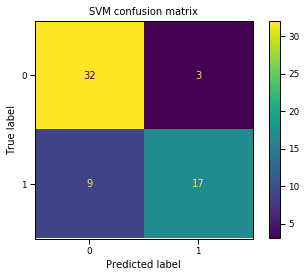

In [54]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.title("SVM confusion matrix")
plt.show()

In [55]:
matrix = confusion_matrix(y_train,y_pred_train, labels=[1,0])
print('Confusion matrix SVM: \n',matrix)

Confusion matrix SVM: 
 [[100  13]
 [  5 124]]


In [56]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_train,y_pred_train,labels=[1,0])
print('Classification report SVM : \n',matrix)

Classification report SVM : 
               precision    recall  f1-score   support

           1       0.95      0.88      0.92       113
           0       0.91      0.96      0.93       129

    accuracy                           0.93       242
   macro avg       0.93      0.92      0.92       242
weighted avg       0.93      0.93      0.93       242



In [57]:
#########################################   Logistic Regression  #############################################################

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Logistic Regression = 0.8636363636363636
Accuracy for test set for Logistic Regression = 0.8032786885245902


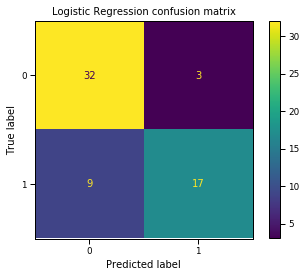

In [60]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.title("Logistic Regression confusion matrix")
plt.show()

In [61]:
matrix = confusion_matrix(y_train,y_pred_train, labels=[1,0])
print('Confusion matrix Logistic Regression: \n',matrix)

Confusion matrix Logistic Regression: 
 [[ 91  22]
 [ 11 118]]


In [62]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_train,y_pred_train,labels=[1,0])
print('Classification report Logistic Regression: \n',matrix)

Classification report Logistic Regression: 
               precision    recall  f1-score   support

           1       0.89      0.81      0.85       113
           0       0.84      0.91      0.88       129

    accuracy                           0.86       242
   macro avg       0.87      0.86      0.86       242
weighted avg       0.87      0.86      0.86       242



In [63]:
#########################################   Decision Tree  #############################################################

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7540983606557377


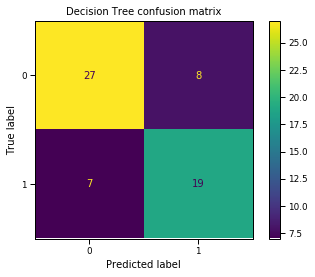

In [65]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.title("Decision Tree confusion matrix")
plt.show()

In [66]:
matrix = confusion_matrix(y_train,y_pred_train, labels=[1,0])
print('Confusion matrix Decision Tree: \n',matrix)

Confusion matrix Decision Tree: 
 [[113   0]
 [  0 129]]


In [67]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_train,y_pred_train,labels=[1,0])
print('Classification report Decision Tree: \n',matrix)

Classification report Decision Tree: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       113
           0       1.00      1.00      1.00       129

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [68]:
#########################################  Random Forest  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



Accuracy for training set for Random Forest = 0.9958677685950413
Accuracy for test set for Random Forest = 0.8032786885245902


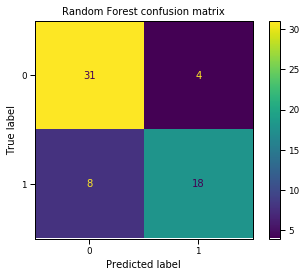

In [70]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.title("Random Forest confusion matrix")
plt.show()

In [71]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_train,y_pred_train,labels=[1,0])
print('Classification report Random Forest: \n',matrix)

Classification report Random Forest: 
               precision    recall  f1-score   support

           1       0.99      1.00      1.00       113
           0       1.00      0.99      1.00       129

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

